<a name="top"></a>
<div style="width:1000 px">

<div style="float:right; width:98 px; height:98px;">
<img src="https://cdn.miami.edu/_assets-common/images/system/um-logo-gray-bg.png" alt="Miami Logo" style="height: 98px;">
</div>

<h1>Applied Data Analysis </h1>
<h1>ATM/MPO 624, spring 2020</h1>
<h2>Modeling the meaning of our data</h2>
<h3>Epidemic math, then problems from/for our 6 class participants' efforts</h3>

<div style="clear:both"></div>
</div>

<hr style="height:2px;">

### Science from data: models of its meaning
1. <a href="#epidemic">Simplest epidemic model</a>
1. <a href="#amy">Dilution and chemistry with age: Amy's problem</a>
1. <a href="#yueyang">Eddies and mean zonal current: Yueyang's work</a>
1. <a href="#ivenis">Regressing signals in gappy SSH series: Ivenis' data</a>
1. <a href="#sisam">Averaging and emergent constraints in CERES grids: Sisam's challenge</a>
1. <a href="#tyler">NAO and PDO Index time series variance and prediction: Tyler's work</a>
1. <a href="#kelsey">Global maps regressed on climate time series (by web): Kelsey's field</a>
1. <a href="#haozhe">Haozhe, are you out there? Got a project to show/share?</a>

<a name="epidemic"></a>
# Simple model of an epidemic: do problems at end

### Definitions: Vulnerable, Sick, Immune

Consider a fixed population (no birth or death) that can be subdivided into 3 categories: Vulnerable V, Sick S, and Recovered R. Model the transition from one state to another through infection and recovery processes. **How?** 

#### Infection
Infection involves an encounter between S and V, with a lot of details we can't know. Whatever those details, we postulate that *infection doubles if S is doubled, or if V is doubled.* From this simple idea, the term must be a product (this is just like chemical kinetics). All the details can be encapsulated in a coefficient *k*, which lumps together both the social likelihood of close-range interaction and infection process details.  

$dS/dt_{infection} = k \times S \times V$

#### Recovery
Sick people recover at some rate, and then are not vulnerable. If twice as many are sick, twice as many recover, so perhaps this proportionality is best modeled as a simple time decay:   

$dS/dt_{recovery} = -S / \tau$

#### Model

$dS/dt_{infection} = kSV - S / \tau$

$dV/dt_{infection} = -kSV$

$dR/dt_{infection} = + S / \tau$



## Epidemic problems: 

1. What is the d/dt equation for V+S+R? (Just add the 3 equations). Discuss what processes we didn't include. 

1. What is the d/dt equation for total cases S+R? 

1. In the very early stages (t << $\tau$, so that R << S, and V >> S is almost a constant, what is the solution S(t)? 

1. (**extra credit**) Is there an analytic solution for the more general case? 

1. We don't like that S(t) from 3., so we take steps that we hope might change the value of k. But perhaps those don't fully kick in until t > $\tau$, an epoch when R is increasing and V begins to decrease as a signficant fraction of people have had the disease. Can we discern with data the difference between V decreasing and a decrease in the value of k? Discuss. 

1. Suppose $kV(0) =$ 3 days, and $\tau = $ 10 days. Use a log10 scale on the y axis, in light of solution 3. above. Make it look like http://bmcnoldy.rsmas.miami.edu/covid19/ if you can. [Is the math too hard for people to understand?](https://www.forbes.com/sites/marshallshepherd/2020/03/23/is-the-math-too-hard-for-people-to-understand-covid-19-coronavirus) Play with k at various times, to see when and how its effect can be discerned and how that differs, from the situation where k remains constant and the infection simply runs out of V to infect. 

1. **Why bother with the code below when [this thing](https://gabgoh.github.io/COVID/index.html) exists?** Well, it was fun to give it a stab, and find out the Professional approach is not far from the simple ideas above!  

In [117]:
# Poor man's epidemic calculator, 
# but just visit https://gabgoh.github.io/COVID/index.html

import numpy as np

# Day 1 setup. Time is discrete in days, starting at day 1 (array element 0)
day = [1]
V = [3.0e9] # 300 million
S = [1.0]
R = [0.0]

# Parameters: kV(0) = 3 days
k0 = 3/V[0]
k = k0
tau = 15. 

# simple forward time stepping by one day
for iday in np.arange(2,365): 
    # print('day ',iday)
    if (iday > 7): 
        k = k0/100
    day.append([iday])
    S.append(np.floor( S[iday-2] + k*S[iday-2]*V[iday-2]) )
    R.append(np.floor( R[iday-2]                         + S[iday-2]/tau) )
    V.append(np.floor( V[iday-2] - k*S[iday-2]*V[iday-2] - S[iday-2]/tau) )

Populating the interactive namespace from numpy and matplotlib


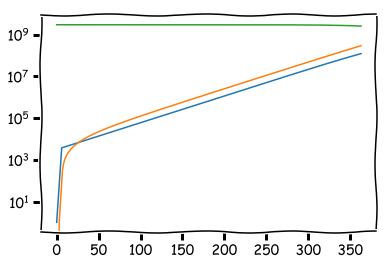

In [118]:
# quick and dirty plotting, looks like my crude time stepping is unstable
%pylab inline 
plt.xkcd() # whiteboard-like whimsical style 
plt.yscale('log')

plot( np.transpose([S,R,V]) )

In [97]:
plt.yscale?

<a href="#top">Back to top </a>

<a name="yueyang"></a>
# Eddies and mean flow; Yueyang model it better with data?

## How does eddy momentum flux relate to mean shear?

Suppose we have velocity (u and v as usual) in an x,y,t domain. Use the overbar like $\overline{u}(y,t)$ to express a zonal mean along the x axis, while $u'(x,y,t) = u(x,y,t)-\overline{u}(y,t)$ indicates *eddy* deviations from that zonal mean. 

Eddy u-momentum flux in the meridional dimension is EMF =  $\overline{u'v'}$. Its convergence EMFC = $-\nabla \cdot \overline{u'v'}$. 

### Modeling the interactions

We might postulate that eddy magnitude EM grows wherever the zonal mean absolute vorticity has a gradient, as strips of vorticity internal to a fluid are known to roll up into balls of vorticity by [shear instability](http://hmf.enseeiht.fr/travaux/CD0001/travaux/optmfn/hi/01pa/hyb72/kh/kh1.gif)). 
At the initial time, the amplitude of eddies is small compared to the mean flow so that eddies evole according to a linearized equation:

(1).     $\partial/\partial t(EM) = \partial/\partial y(f + \partial [u]/\partial y)$.                       

The mean flow evolves according to EMFC and a simple damping: 

(2).     $\partial \overline{u}/\partial t = f_0 \overline{v} + EMFC - \overline{u} /\tau$.

Yueyang what do you think? Maybe it's like [this paper](https://journals.ametsoc.org/doi/pdf/10.1175/JPO-D-15-0139.1)... haven't read it... 

**(This is just my crude recall of Yueyang's earlier notebook from his [fork](https://github.com/LuluTex/MPO624-2020)). Yueyang, feel free to take over & make it make better sense!**

<a href="#top">Back to top </a>

<a name="kelsey"></a>
# Regressions of fields on indices: all do this 

## Global maps associated with time series from certain regions

#### Regress maps to time series with this [web engine](https://www.esrl.noaa.gov/psd/data/correlation/)

#### For everyone
Spend about an hour playing with it. Capture some interesting features and share them with the class. 

Notice the "random" time series. For your favorite signal, compare your result to the identically scaled and colored plot using a random time series. How much of the signal pattern should you trust, based on your record length? 